In [92]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
image = cv2.imread('rgb.jpg', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [93]:
height = image.shape[0] 
width = image.shape[1] 
color = image.shape[2]

In [94]:
print(height,width,color)

246 246 3


In [95]:
for i in range(height):
    for j in range(width):
        for k in range(color):
            image[i][j][k]

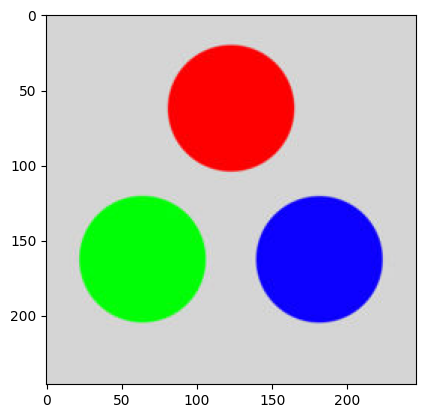

In [96]:
plt.imshow(image)

255


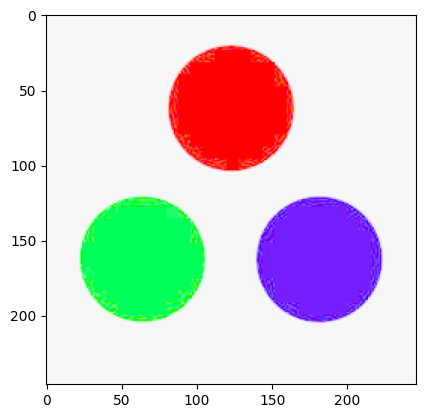

In [97]:
#logarithmic transformation
mx=-1
for i in range(height):
    for j in range(width):
        for k in range(color):
            mx=max(mx,image[i][j][k])


print(mx)

newimg=np.empty(shape=(height,width,color))
#s=c*log(1+r)
#c=255/log(1+maxpixel)

c=255/np.log(1+mx)
for i in range(height):
    for j in range(width):
        for k in range(color):
            newimg[i][j][k]=c*np.log(1+image[i][j][k])
            newimg[i][j][k]/=255
            
plt.imshow(newimg)

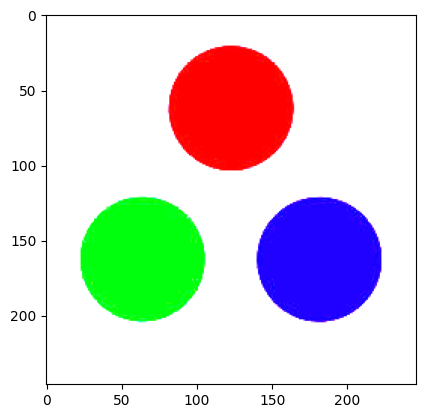

In [101]:
#Power Law or Gamma Correction transformatiom


# use gamma value [.5 to 1.5 to get btter performace] 
# to dark 0.8 
# to bright the image 1.2


gamma=np.float32(input("Enter gamma value = "))

neg=0
if(gamma<0):
    neg=1
    gamma=np.abs(gamma)

newimg=np.empty(shape=(height,width,color))
for i in range(height):
    for j in range(width):
        for k in range(color):
            newimg[i][j][k]=np.power(image[i][j][k],gamma)
            

            if(neg==1):
                newimg[i][j][k]=1/newimg[i][j][k]
            
           
            newimg[i][j][k]=max(0,newimg[i][j][k])
            newimg[i][j][k]=min(255,newimg[i][j][k])
            newimg[i][j][k]/=255
        


plt.imshow(newimg)